In [ ]:
!pip install pyLDAvis
!pip install --upgrade --force-reinstall pandas numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 76.5 MB/s 

In [ ]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

import pymc as pm
import arviz as az

from gensim import corpora
from gensim.models import LdaModel

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# DO NOT MODIFY THIS CODE
website_visits_data = np.loadtxt('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/website_visits.csv', delimiter=',')

(0.0, 80.0)

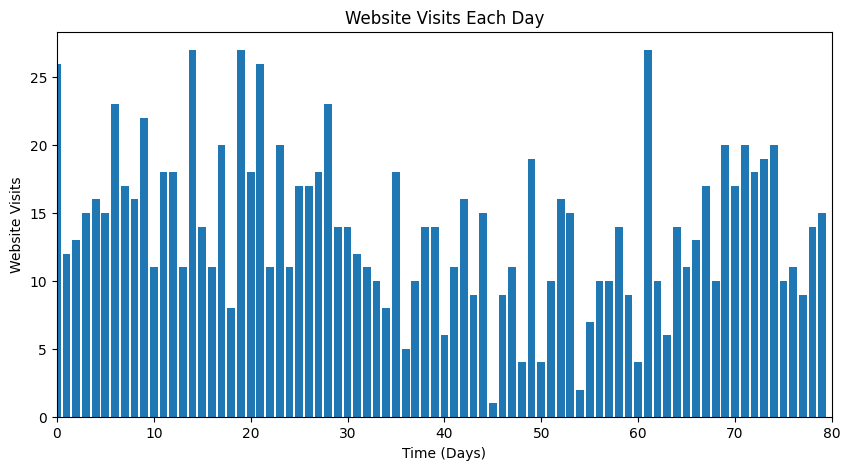

In [ ]:
# YOUR CODE STARTS HERE

website_visits_data = np.array(website_visits_data)

plt.figure(figsize=(10,5))
plt.bar(np.arange(len(website_visits_data)), website_visits_data)
plt.xlabel("Time (Days)")
plt.ylabel("Website Visits")
plt.title("Website Visits Each Day")
plt.xlim(0, len(website_visits_data))

**Enter your answer here:** There was a drop of visits after around 30 days but then recovered and increased from around 60 days. These could likely be switchpoints in the data.

In [ ]:
# DO NOT MODIFY THIS CODE

param_names = ['tau_1', 'tau_2', 'lambda_1', 'lambda_2', 'lambda_3']

double_switchpoint_model = pm.Model()

with double_switchpoint_model:

  # Define priors
  # YOUR CODE STARTS HERE (FILL IN THE BLANKS)
  alpha = 1/np.mean(website_visits_data)
  tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper= 79)
  tau_2 = pm.DiscreteUniform("tau_2", lower=0, upper= 79)
  lambda_1 = pm.Exponential("lambda_1", alpha)
  lambda_2 = pm.Exponential("lambda_2", alpha)
  lambda_3 = pm.Exponential("lambda_3", alpha)
  idx = np.arange(len(website_visits_data))
  lambda_12 = pm.math.switch(idx < tau_1, lambda_1, lambda_2)
  lambda_ = pm.math.switch(idx < tau_2, lambda_12, lambda_3)


  # Define likelihood (conditioned on observed data)
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  likelihood = pm.Poisson("visits", lambda_, observed = website_visits_data)

  # Sample from posterior
  # YOUR CODE STARTS HERE (FILL IN THE BLANK)
  trace = pm.sample(1000, random_seed=45, progressbar=False)

ERROR:pymc.stats.convergence:There were 513 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [ ]:
# Function to: (a) plot histogram of posterior samples (b) display mean and 94% HDI of posterior samples

def plot_posterior(param_name, trace):

    # (a) Plot histogram of posterior samples of passed parameter
    posterior_samples = trace.posterior[param_name].values.flatten()
    plt.hist(posterior_samples, bins=30, edgecolor='black')  # You can adjust `bins` as needed
    plt.xlim(0, len(website_visits_data))
    plt.xlabel(param_name)
    plt.ylabel('Number of Samples')
    plt.title('Histogram of Posterior Samples of ' + str(param_name))


    # (b) Display mean and 94% HDI of posterior samples of passed parameter (round to 2 decimal places)
    # YOUR CODE STARTS HERE
    print(f"\nMean of {param_name}: {np.mean(trace.posterior[param_name].values.flatten())}")
    hdi = az.hdi(trace.posterior[param_name].values.flatten())
    print(f"HDI of {param_name}: {hdi}")

    return None


Mean of tau_1: 47.6275
HDI of tau_1: [23 79]


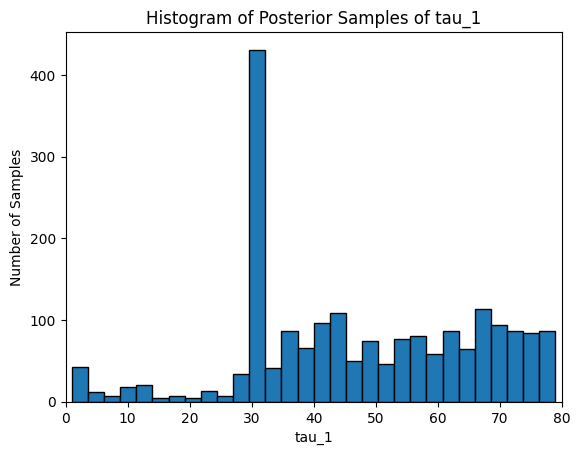


Mean of tau_2: 34.514
HDI of tau_2: [29 61]


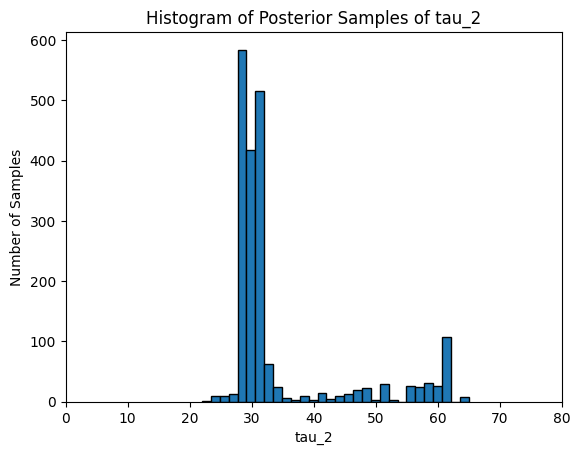


Mean of lambda_1: 17.40672423960463
HDI of lambda_1: [16.11039154 19.37773645]


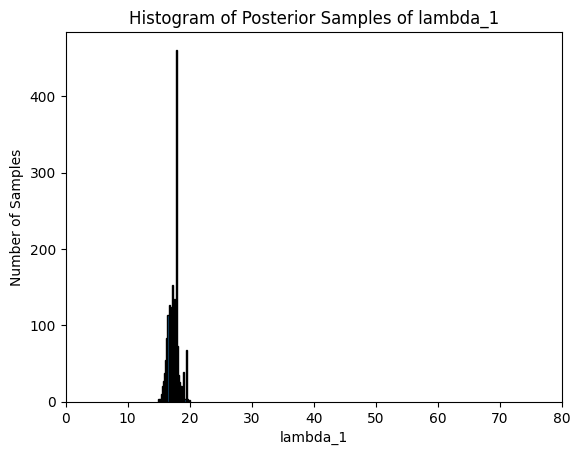


Mean of lambda_2: 13.2670573318711
HDI of lambda_2: [3.84675167e-03 3.50766646e+01]


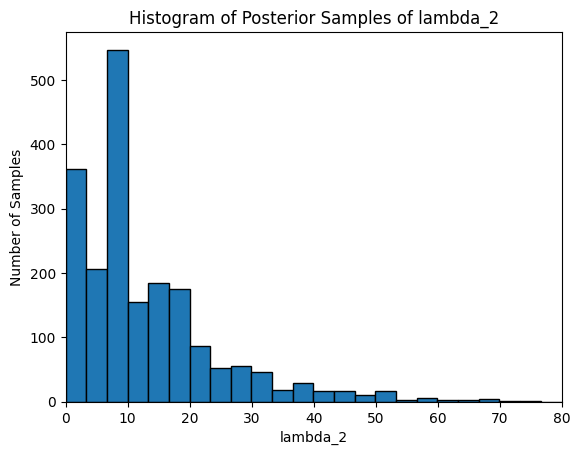


Mean of lambda_3: 12.092717371541937
HDI of lambda_3: [11.20898502 12.93217649]


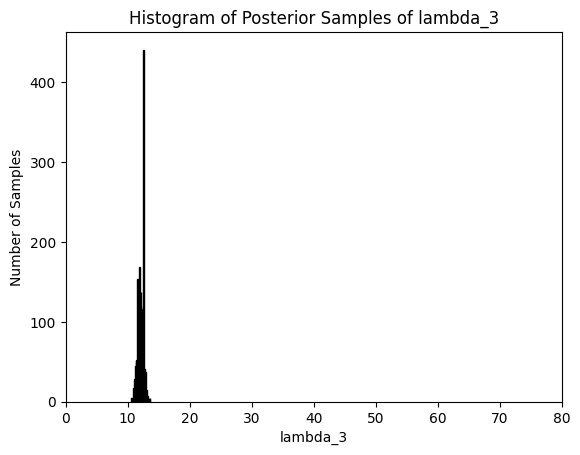

In [ ]:
# DO NOT MODIFY THIS CODE
for param_name in param_names:
    plot_posterior(param_name, trace)
    plt.show()

**Enter answer here:** The model is a decent fit since lambda 2 has a large HDI which indicative of bad fitting.

However, the histograms of the posterior samples align with my expectations from part a.

In [ ]:
# DO NOT MODIFY THIS CODE

double_switchpoint_model_adjusted = pm.Model()

with double_switchpoint_model_adjusted:

  # Define priors
  # YOUR CODE STARTS HERE
  alpha = 1/np.mean(website_visits_data)
  tau_1 = pm.DiscreteUniform("tau_1", lower=0, upper= 79)
  tau_2 = pm.DiscreteUniform("tau_2", lower= tau_1 + 1, upper= 79)
  lambda_1 = pm.Exponential("lambda_1", alpha)
  lambda_2 = pm.Exponential("lambda_2", alpha)
  lambda_3 = pm.Exponential("lambda_3", alpha)
  idx = np.arange(len(website_visits_data))
  lambda_12 = pm.math.switch(idx < tau_1, lambda_1, lambda_2)
  lambda_ = pm.math.switch(idx < tau_2, lambda_12, lambda_3)

  # Define likelihood (conditioned on observed data)
  # YOUR CODE STARTS HERE
  likelihood = pm.Poisson("visits", lambda_,observed = website_visits_data)

  # Sample from posterior
  # YOUR CODE STARTS HERE
  trace_adjusted = pm.sample(1000,random_seed = 45,progressbar=False)

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


**Enter your answer here:** The taus can have values 0-79 inclusive, but then it's possible for tau_1 to be greater than tau_2 in terms of its HDI range. Simply set the lower bound of tau_2 to tau_1 + (a small number)


Mean of tau_1: 30.8305
HDI of tau_1: [29 33]


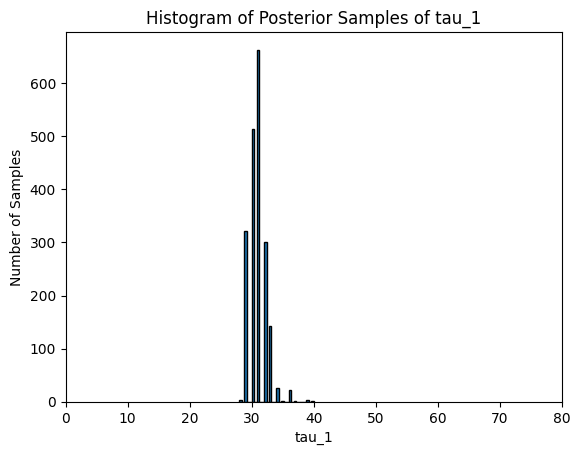


Mean of tau_2: 62.345
HDI of tau_2: [59 69]


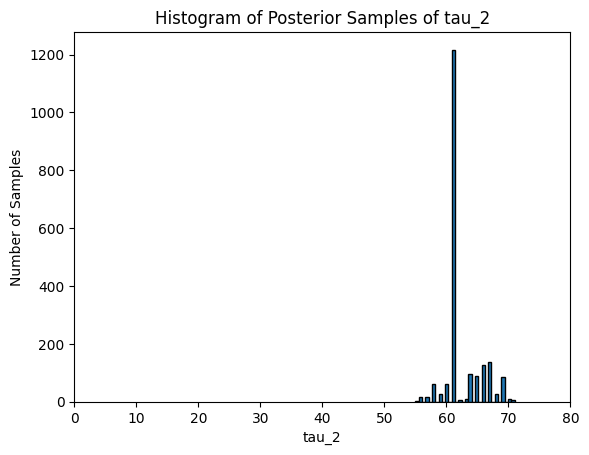


Mean of lambda_1: 17.065964410944968
HDI of lambda_1: [15.66402304 18.54163711]


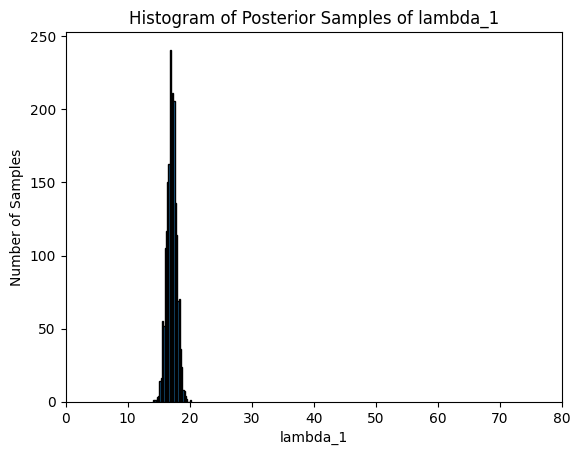


Mean of lambda_2: 10.351534904069846
HDI of lambda_2: [ 9.17950812 11.50272726]


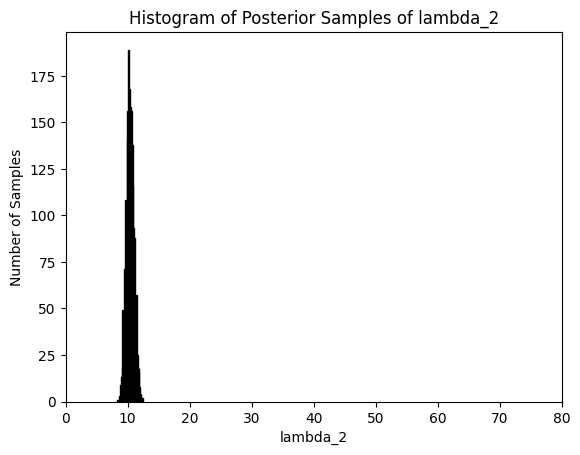


Mean of lambda_3: 14.832636221127853
HDI of lambda_3: [12.88384336 16.67858068]


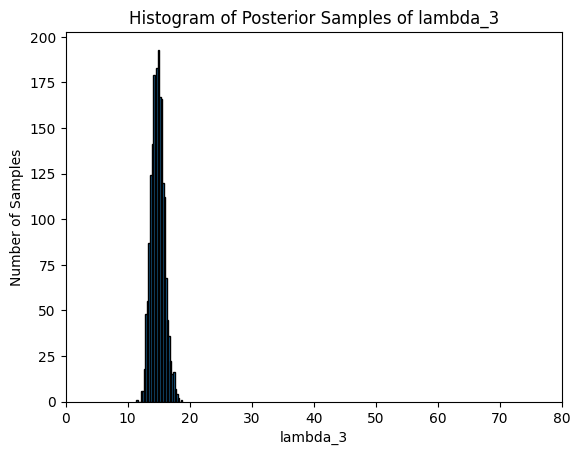

In [ ]:
# YOUR CODE GOES HERE
for param_name in param_names:
    plot_posterior(param_name, trace_adjusted)
    plt.show()

**Enter answer here:** It seems like a good fit since all the lamdbas have narrow HDI' ranges and the histogram of posterior samples align with results from part a.

In [ ]:
topic_df = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/topic_dataset.csv')
topic_df["preprocessed"] = topic_df["preprocessed"].apply(lambda x: ast.literal_eval(x))
topic_df.head()

,document,preprocessed
0,Hi Xperts!\n\nHow can I move the cursor with t...,"[xperts, cursor, keyboard, cursor, key, mouse,..."
1,Where can I obtain a copy of the Open Look wid...,"[obtain, copy, open, look, widget, obtainable,..."
2,\nYou're right about the signal being strong. ...,"[right, signal, strong, live, west, philadelph..."
3,"\nHe's a Canadian ""thing"". Former coach of the...","[canadian, thing, coach, boston, bruin, colora..."
4,"\n\n Heck, I seem to feel like that *ev...","[heck, feel, like, time, including, cafeteria,..."


In [ ]:
## YOUR CODE GOES HERE
texts = topic_df['preprocessed']
dictionary = corpora.Dictionary(texts)
print(len(dictionary))

stops = set(stopwords.words('english')).union(set(ENGLISH_STOP_WORDS))
ids = [dictionary.token2id[stopword] for stopword in stops if stopword in dictionary.token2id]
dictionary.filter_tokens(ids)
dictionary.filter_extremes(no_below = 2)
dictionary.filter_extremes(no_above= 0.5)
dictionary.compactify()
print(len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]

49388
12325


In [ ]:
# Train LDA model

# YOUR CODE GOES HERE
topic_model = LdaModel(corpus, id2word = dictionary, num_topics = 10, iterations = 100, eval_every = None, random_state = 100, minimum_probability = 0)

In [ ]:
# Display LDA visualization

# YOUR CODE GOES HERE
lda_topic_diagram = pyLDAvis.gensim_models.prepare(topic_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_topic_diagram)
lda_topic_diagram

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.098355 -0.008029       1        1  17.307905
1     -0.183558 -0.107652       2        1  10.126147
2      0.012400  0.163457       3        1   5.405787
3     -0.050902  0.030655       4        1   7.410404
4      0.085787  0.043409       5        1   4.848732
5     -0.055921  0.036867       6        1   9.956483
6     -0.121706 -0.049556       7        1  13.659480
7      0.014280  0.035179       8        1  11.075134
8      0.005995 -0.002908       9        1  14.641401
9      0.195271 -0.141422      10        1   5.568527, topic_info=            Term         Freq        Total Category  logprob  loglift
126         game  2219.000000  2219.000000  Default  30.0000  30.0000
633     armenian  1763.000000  1763.000000  Default  29.0000  29.0000
3022        bike   755.000000   755.000000  Default  28.0000  28.0000
88          team  1462.000000  1462.000000  Default  27.0000  27.0000
1539         jew   616.000000   616.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
1614  university   138.175798   712.182357  Topic10  -5.5859   1.2482
2045    american   134.594642   656.039406  Topic10  -5.6121   1.3041
1027      series   127.948482   453.797538  Topic10  -5.6628   1.6220
50          home   135.290813   748.857998  Topic10  -5.6070   1.1769
1536        arab   126.724869   676.042773  Topic10  -5.6724   1.2138

[873 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
5961       5  0.922241       abbott
2379       9  0.981170      abiding
9707       2  0.911000  accelerator
9707       5  0.050611  accelerator
9707       9  0.016870  accelerator
...      ...       ...          ...
2275       7  0.022187         york
2275       8  0.019414         york
2275       9  0.030508         york
2275      10  0.585191         york
10394      9  0.959949         zoom

[3698 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

**Enter answer here:**

Topic 2:
  top 5: window, list, server, file, version. This topic is most likely related to software engineering or software tech.

Topic 3:
  top 5: bike, like, good, think, road. This topic is most likely related to commuting, or traveling.

Topic 10:
  top 5: game, team, jew, hockey, season. This topic is most likely related to a hockey tournament, or just hockey in general.